In [490]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [491]:
import numpy as np
from matplotlib import pyplot as plt

from src.channel_blocks import ChannelBlocks
from src.channel_simulation import ChannelSimulator
from src.split_step_fourier import SplitStepFourier
from src.visualizer import Visualizer
from src.signal_processing import SP

# Channel Simulation
here starts the actual channel simulator code.

In [492]:

modify_t0 = 1e0
modify_zn = 1e0
modify_h = 1e0
modify_au = 1

dt = 1e-12  # 1e-12

test_verbose = False

cs = ChannelSimulator(m_qam=16,
                      num_symbols=512,
                      normalization_factor=1e-3 * modify_au,
                      dt=dt,
                      channel_func=SplitStepFourier(
                          alpha=0,
                          b2=-20e-27,
                          gamma=0.003,
                          t0=125e-12 * modify_t0,
                          dt=dt,
                          z_n=1 * modify_zn,
                          h=500 * modify_h
                      ),
                      verbose=True)

np.set_printoptions(threshold=250)

number of iterations in split step algo: 1562


In [493]:
cs.step0_gen_msg()  # generate message


_______________________________________________
message before channel - len=2048
[[1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]
 ...
 [0 1 1 0]
 [1 0 0 0]
 [0 1 1 1]]


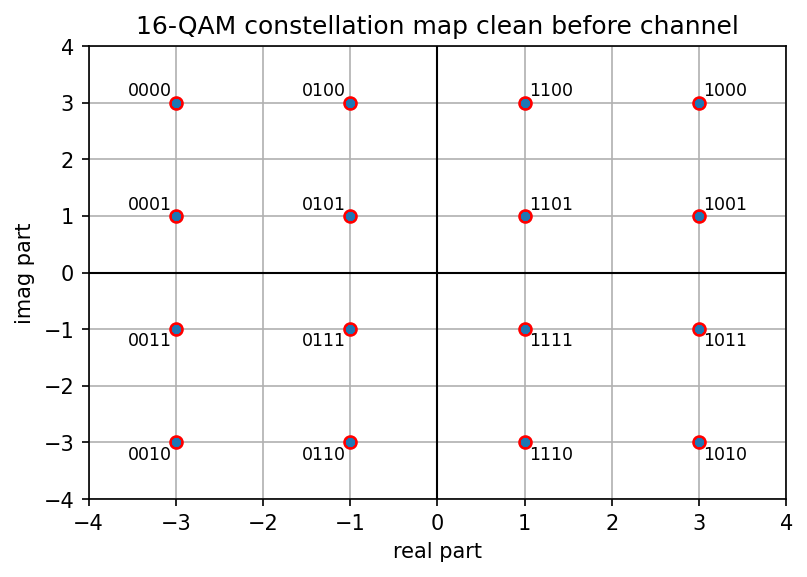

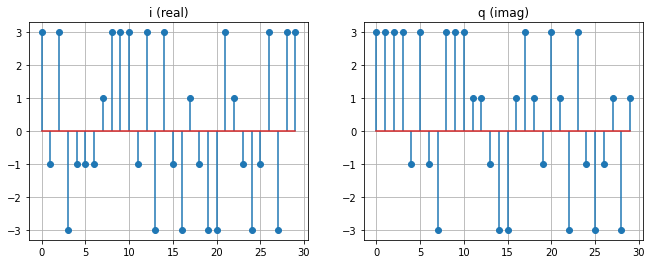

num of symbols = 512


In [494]:
cs.step1_modulate()  # modulate

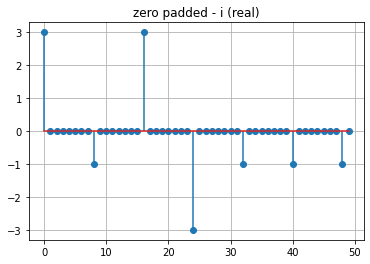

vec length = 4096, over_sampling period = 8


In [495]:
cs.step2_over_sample()  # over sample

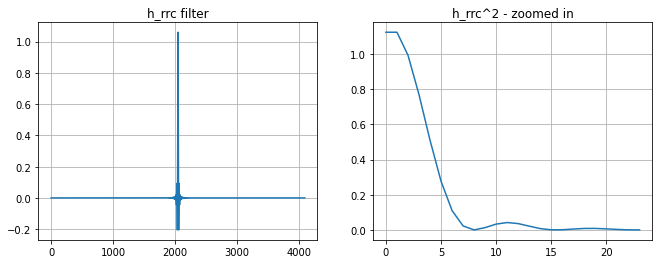

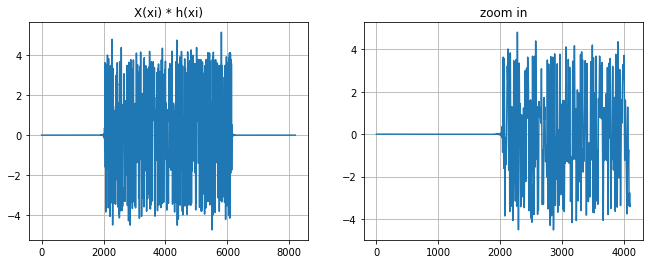

filter len = 4097, signal len = 8192


In [496]:
cs.step3_pulse_shaping()  # pulse shaping

xi ∈ [-1570.41:1570.80] GHz ,	 N_xi   (=M) = 8192
t  ∈ [-4096.00:4095.00] ps    ,	 N_time (=D) = 8192
BW = 1570.80 GHz


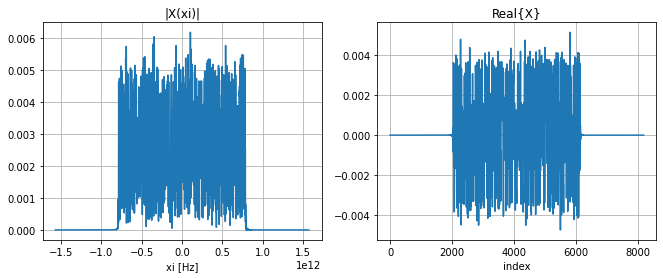

signal len = 8192


In [497]:
cs.step4_pre_equalize()  # pre equalize (equalize before inft)

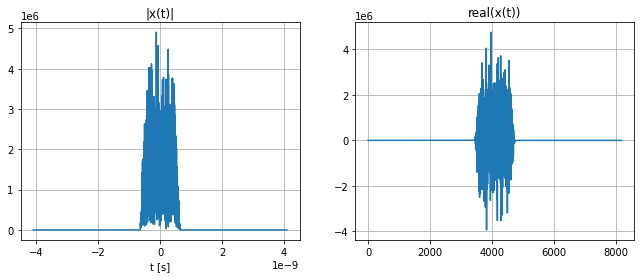

length of INFT(x) = 8192
signal power = 5.68e+07
signal bw = [-6.36e-10:6.36e-10]


In [498]:
cs.step5_inft()  # inft

In [ ]:
backup_x5 = cs.x[5].copy()
Visualizer.print_signal_specs(backup_x5,cs.tvec)

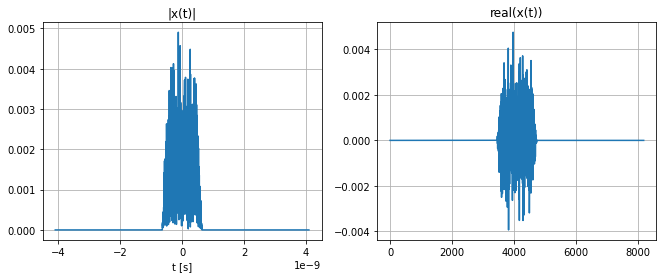

length of INFT(x) = 8192
signal power = 5.68e-02
signal bw = [-6.36e-10:6.36e-10]


In [500]:
# equalize before channel
cs.x[5] = backup_x5 * 1e-9

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))
Visualizer.my_plot(cs.tvec, np.abs(cs.x[5]), name=f'|x(t)|', xlabel='t [s]', ax=ax1,
                   hold=1)
Visualizer.my_plot(np.real(cs.x[5]), name=f'real(x(t))', ax=ax2)
print(f'length of INFT(x) = {len(cs.x[5])}')

th = np.max(np.abs(cs.x[5])) * 0.01
Visualizer.print_signal_specs(cs.x[5], cs.tvec, th)

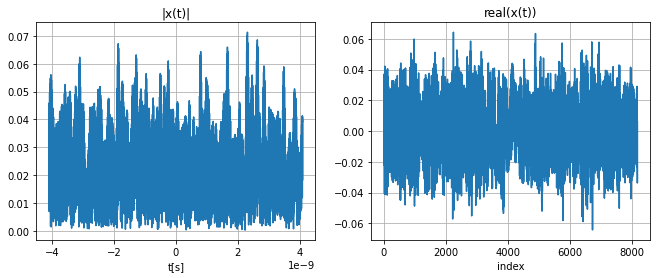

In [501]:
cs.step6_channel()  # channel (ssf)

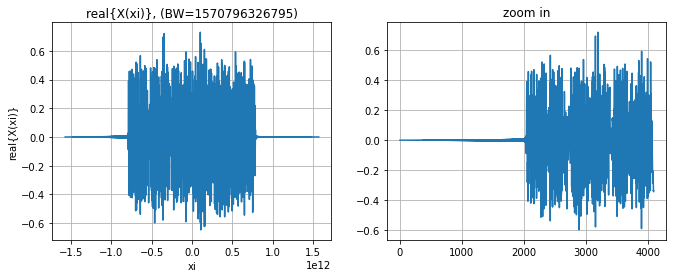

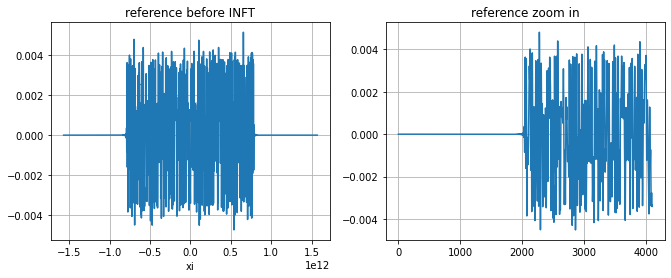

In [502]:
cs.x[6] *= 1e11
cs.step7_nft()  # nft

In [503]:
cs.step8_equalize()  # equalizer

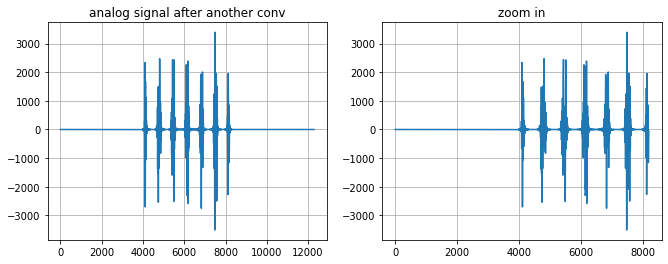

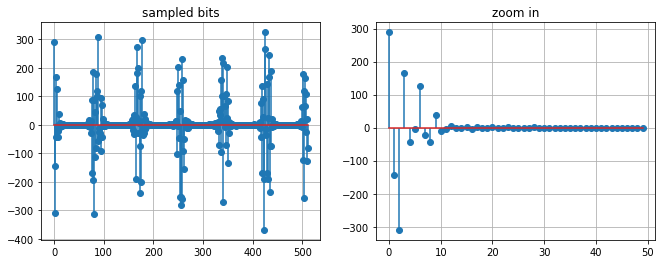

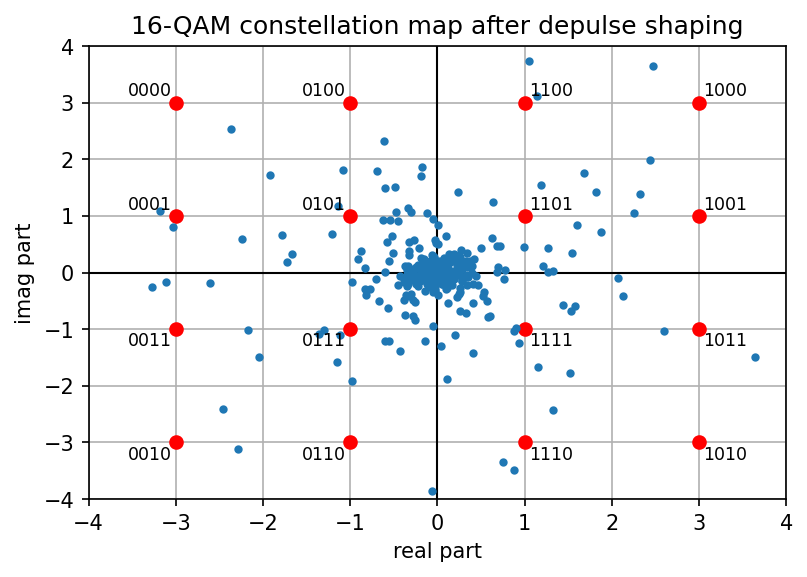

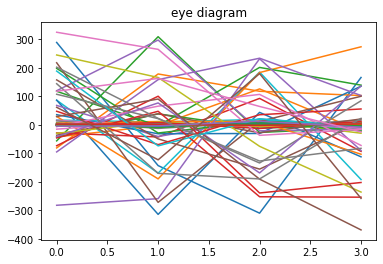

num of sampled symbols = 512 


In [504]:
cs.step9_match_filter()  # match filter

In [505]:
cs.step10_demodulate()  # demod()


_______________________________________________
message after channel - len=2048
[[1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 ...
 [1 0 0 0]
 [0 0 0 0]
 [0 0 1 0]]


In [506]:
ber, num_errors = cs.evaluate()

ber = 0.4990234375 = 1022/2048
